<a href="https://colab.research.google.com/github/Omar-Eltramsy/CodeAlpha_Iris-Flower-classification/blob/main/Iris_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabh00007/iriscsv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iriscsv


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for classification task
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'/kaggle/input/iriscsv/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop('Id',axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.groupby('Species').size()

,0
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


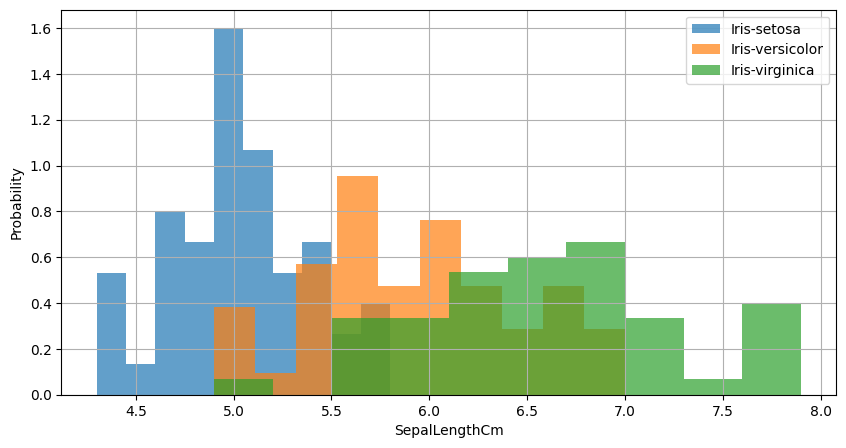

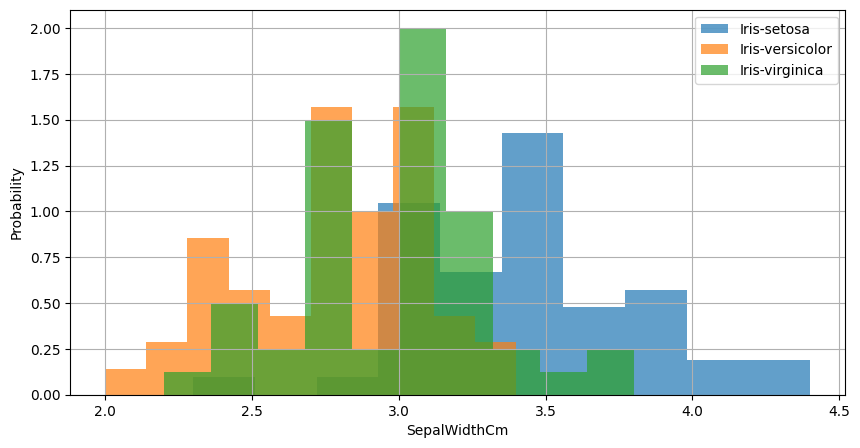

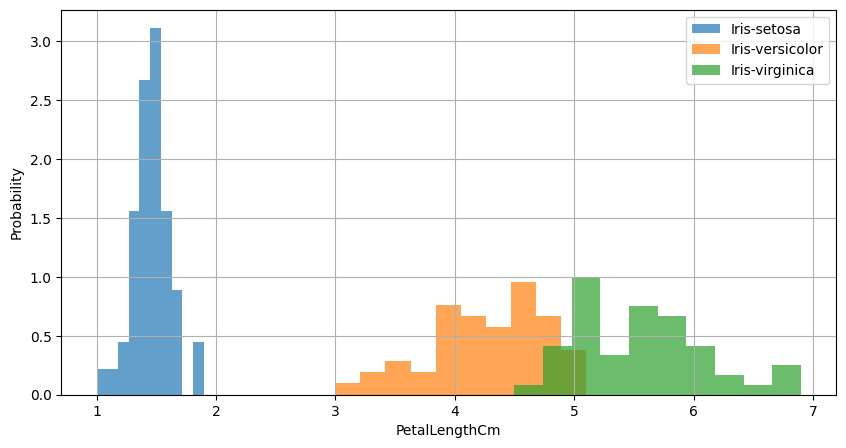

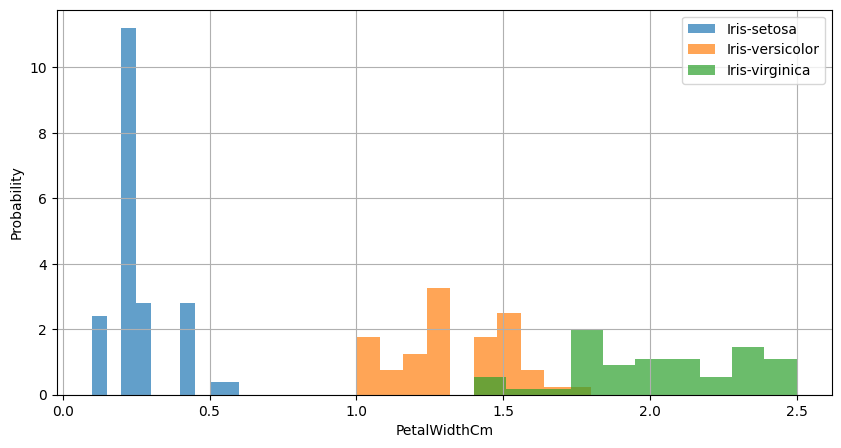

In [ ]:
for col in df.columns[:-1]:
  plt.figure(figsize=(10, 5))
  for Species in df['Species'].unique():
    plt.hist(df[df['Species']==Species][col] ,alpha=0.7,label=Species,density=True)
  plt.xlabel(col)
  plt.ylabel('Probability')
  plt.legend()
  plt.grid(True)
  plt.show()

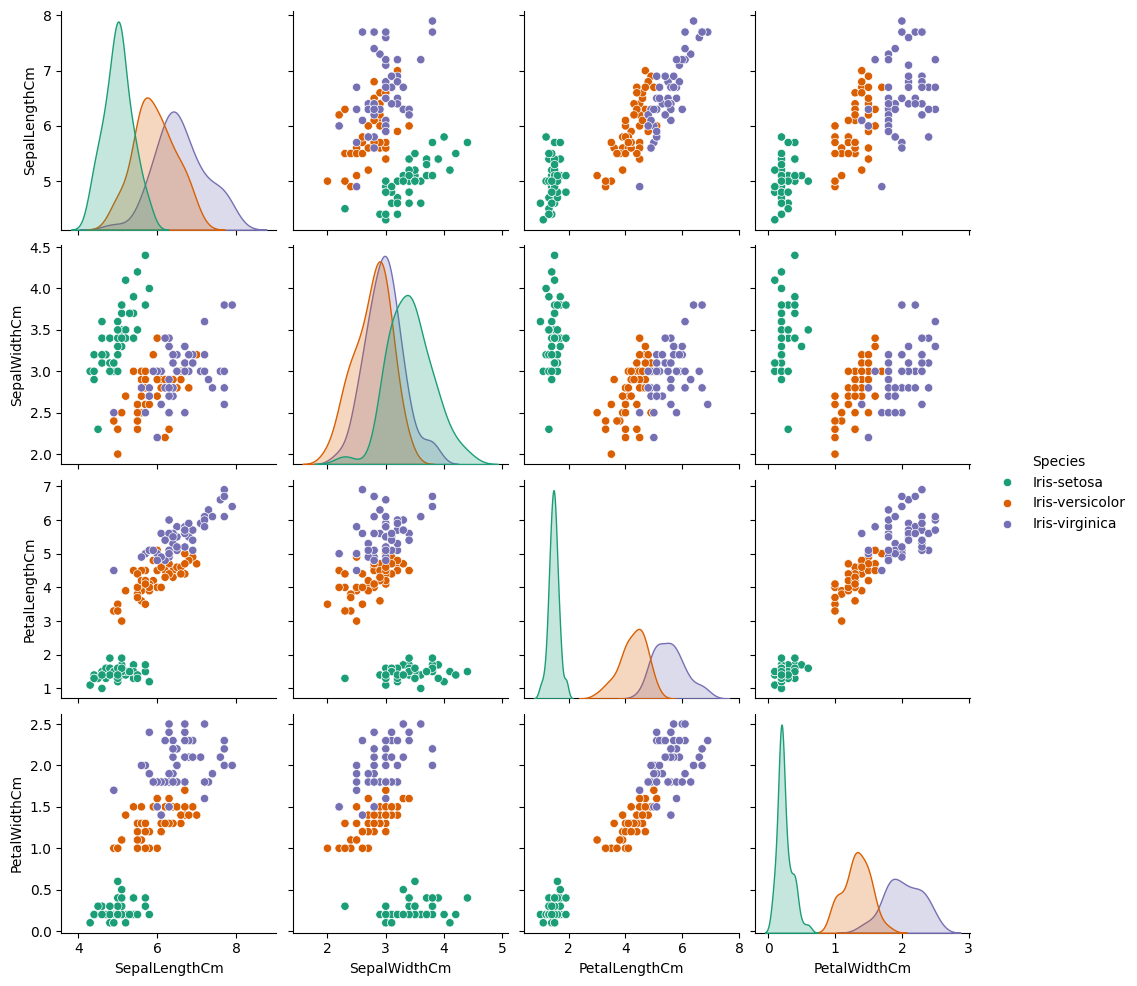

In [ ]:
sns.pairplot(df,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

# Train , Validation, Test datasets

In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
for Species in df['Species'].unique():
  print(len(train[train['Species']==Species]))

31
29
30


In [ ]:
def scale_dataset(df,oversampling=False):
  x=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  if oversampling :
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y

In [ ]:
train,x_train, y_train=scale_dataset(train,oversampling=True)
valid,x_valid, y_valid=scale_dataset(valid,oversampling=False)
test,x_test, y_test=scale_dataset(test,oversampling=False)

In [ ]:
train_df = pd.DataFrame(train, columns=df.columns)
for Species in df['Species'].unique():
  print(len(train_df[train_df['Species']==Species]))

31
31
31


# K-NN Model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict=kn.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.75      0.86      0.80         7

       accuracy                           0.90        30
      macro avg       0.89      0.91      0.90        30
   weighted avg       0.91      0.90      0.90        30



# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_predicted=naive.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.70      1.00      0.82         7

       accuracy                           0.90        30
      macro avg       0.90      0.93      0.90        30
   weighted avg       0.93      0.90      0.90        30



# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predicted=lg.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.96      0.93        30
   weighted avg       0.95      0.93      0.94        30



# SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_predicted=svm.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

